In [37]:
# -*- coding: utf-8 -*-

import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd
file1= pd.read_excel("D:\\大三\\数学建模\\C题\\qe4\\sheet1.xlsx").fillna(0)
file2= pd.read_excel("D:\\大三\\数学建模\\C题\\qe4\\sheet2.xlsx").fillna(0)
file3= pd.read_excel("D:\\大三\\数学建模\\C题\\qe4\\sheet3.xlsx").fillna(0)
file4= pd.read_excel("D:\\大三\\数学建模\\C题\\qe4\\sheet4.xlsx").fillna(0)
f1 = file1.iloc[:,1:-5]
f2 = file2.iloc[:,1:-5]
f3 = file3.iloc[:,1:-5]
f4 = file4.iloc[:,1:-5]

f3=f3.iloc[:,[0,2,3,5,6,7,10]]
print(f3)

x=[]
x.append(file1.values)
x.append(file2.values)
x.append(file3.values)
x.append(file4.values)


for m in range(4):
    for i in range(1,15):
        sum = 0
        min= 999
        max=0
        for j in range(0,len(x[m])):
            sum += x[m][j,i]
            if x[m][j,i]>max:
                max=x[m][j,i]
            if x[m][j,i]<min:
                min=x[m][j,i]
        for j in range (0,len(x[m])):
            if max == min:
                if max == 0 :
                    x[m][j,i] = 0
                else:
                    max=0
            else:            
                x[m][j,i]=(x[m][j,i]-min)/(max-min)
    x[m]=x[m][:,1:-5].astype(float)
   



    







   (SiO2)  (K2O)  (CaO)  (Al2O3)  (Fe2O3)  (CuO)  (P2O5)
0   92.63   0.00   1.07     1.98     0.17   3.24    0.61
1   95.02   0.59   0.62     1.32     0.32   1.55    0.35
2   96.77   0.92   0.21     0.81     0.26   0.84    0.00
3   94.29   1.01   0.72     1.46     0.29   1.65    0.15
4   92.35   0.74   1.66     3.50     0.35   0.55    0.21
5   92.72   0.00   0.94     2.51     0.20   1.54    0.36


In [38]:
%matplotlib inline
import matplotlib.pyplot as plt 
# f1 = np.polyfit(x[0][:,1],x[0][:,2],3)
# p1 = np.poly1d(f1)
# yvals = p1(x[0][:,1])
# plot1 = plt.plot(x[0][:,1], x[0][:,2], 's',label='original values')
# plot2 = plt.plot(x[0][:,1], yvals, 'r',label='polyfit values')

plt.rcParams['figure.figsize'] = (8.0, 4.0) # 设置figure_size尺寸
plt.rcParams['image.interpolation'] = 'nearest' # 设置 interpolation style

plt.rcParams['savefig.dpi'] = 500 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.xlabel('x')
plt.ylabel('y')
# plt.figure()
ax=[]
for m in range(4):
    for i in range (14):
        for j in range(14):
            plt.subplot(14,14,j*14+i+1)
            plt.plot(x[m][:,i],x[m][:,j],'o',markersize=1)
            plt.xticks([])
            plt.yticks([])
    plt.savefig("plot{}.png".format(m+1))
    plt.clf()


C:\Users\BIG Fu\AppData\Local\Temp\ipykernel_840\3919902538.py:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(14,14,j*14+i+1)


<Figure size 2400x1200 with 0 Axes>

In [39]:
from hashlib import new
from numpy import *
# 无量纲化
def dimensionlessProcessing(df):
    newDataFrame = pd.DataFrame(index=df.index)
    columns = df.columns.tolist()
    for c in columns:
        d = df[c]
        MAX = d.max()
        MIN = d.min()
        MEAN = d.mean()
        newDataFrame[c] = ((d - MEAN) / (MAX - MIN)).tolist()
    return newDataFrame

def GRA_ONE(gray, m=0):
    # 读取为df格式
    gray = dimensionlessProcessing(gray)
    # 标准化
    std = gray.iloc[:, m]  # 为标准要素
    gray.drop(str(m),axis=1,inplace=True)
    ce = gray.iloc[:, 0:]  # 为比较要素
    shape_n, shape_m = ce.shape[0], ce.shape[1]  # 计算行列

    # 与标准要素比较，相减
    a = zeros([shape_m, shape_n])
    for i in range(shape_m):
        for j in range(shape_n):
            a[i, j] = abs(ce.iloc[j, i] - std[j])

    # 取出矩阵中最大值与最小值
    c, d = amax(a), amin(a)

    # 计算值
    result = zeros([shape_m, shape_n])
    for i in range(shape_m):
        for j in range(shape_n):
            result[i, j] = (d + 0.5 * c) / (a[i, j] + 0.5 * c)

    # 求均值，得到灰色关联值,并返回
    result_list = [mean(result[i, :]) for i in range(shape_m)]
    result_list.insert(m,1)
    return pd.DataFrame(result_list)


def GRA(DataFrame):
    df = DataFrame.copy()
    list_columns = [
        str(s) for s in range(len(df.columns)) if s not in [None]
    ]

    df_local = pd.DataFrame(columns=list_columns)
    df.columns=list_columns
    for i in range(len(df.columns)):
        df_local.iloc[:, i] = GRA_ONE(df, m=i)[0]
    return df_local


In [40]:
import seaborn as sns
def ShowGRAHeatMap(DataFrame,columns):
    colormap = plt.cm.RdBu
    ylabels = columns.tolist()
    print(columns)
    f, ax = plt.subplots(figsize=(14, 14))
    ax.set_title('GRA HeatMap')
    
    # 设置展示一半，如果不需要注释掉mask即可
    # mask = np.zeros_like(DataFrame)
    # mask[np.triu_indices_from(mask)] = True
    
    with sns.axes_style("white"):
        sns.heatmap(DataFrame,
                    cmap="YlGnBu",
                    annot=True,
                    xticklabels=ylabels,
                    yticklabels=ylabels
                    # mask=mask,
                   )
    plt.show()


Index(['(SiO2)', '(Na2O)', '(K2O)', '(CaO)', '(MgO)', '(Al2O3)', '(Fe2O3)',
       '(CuO)', '(PbO)', '(BaO)', '(P2O5)', '(SrO)', '(SnO2)', '(SO2)'],
      dtype='object')


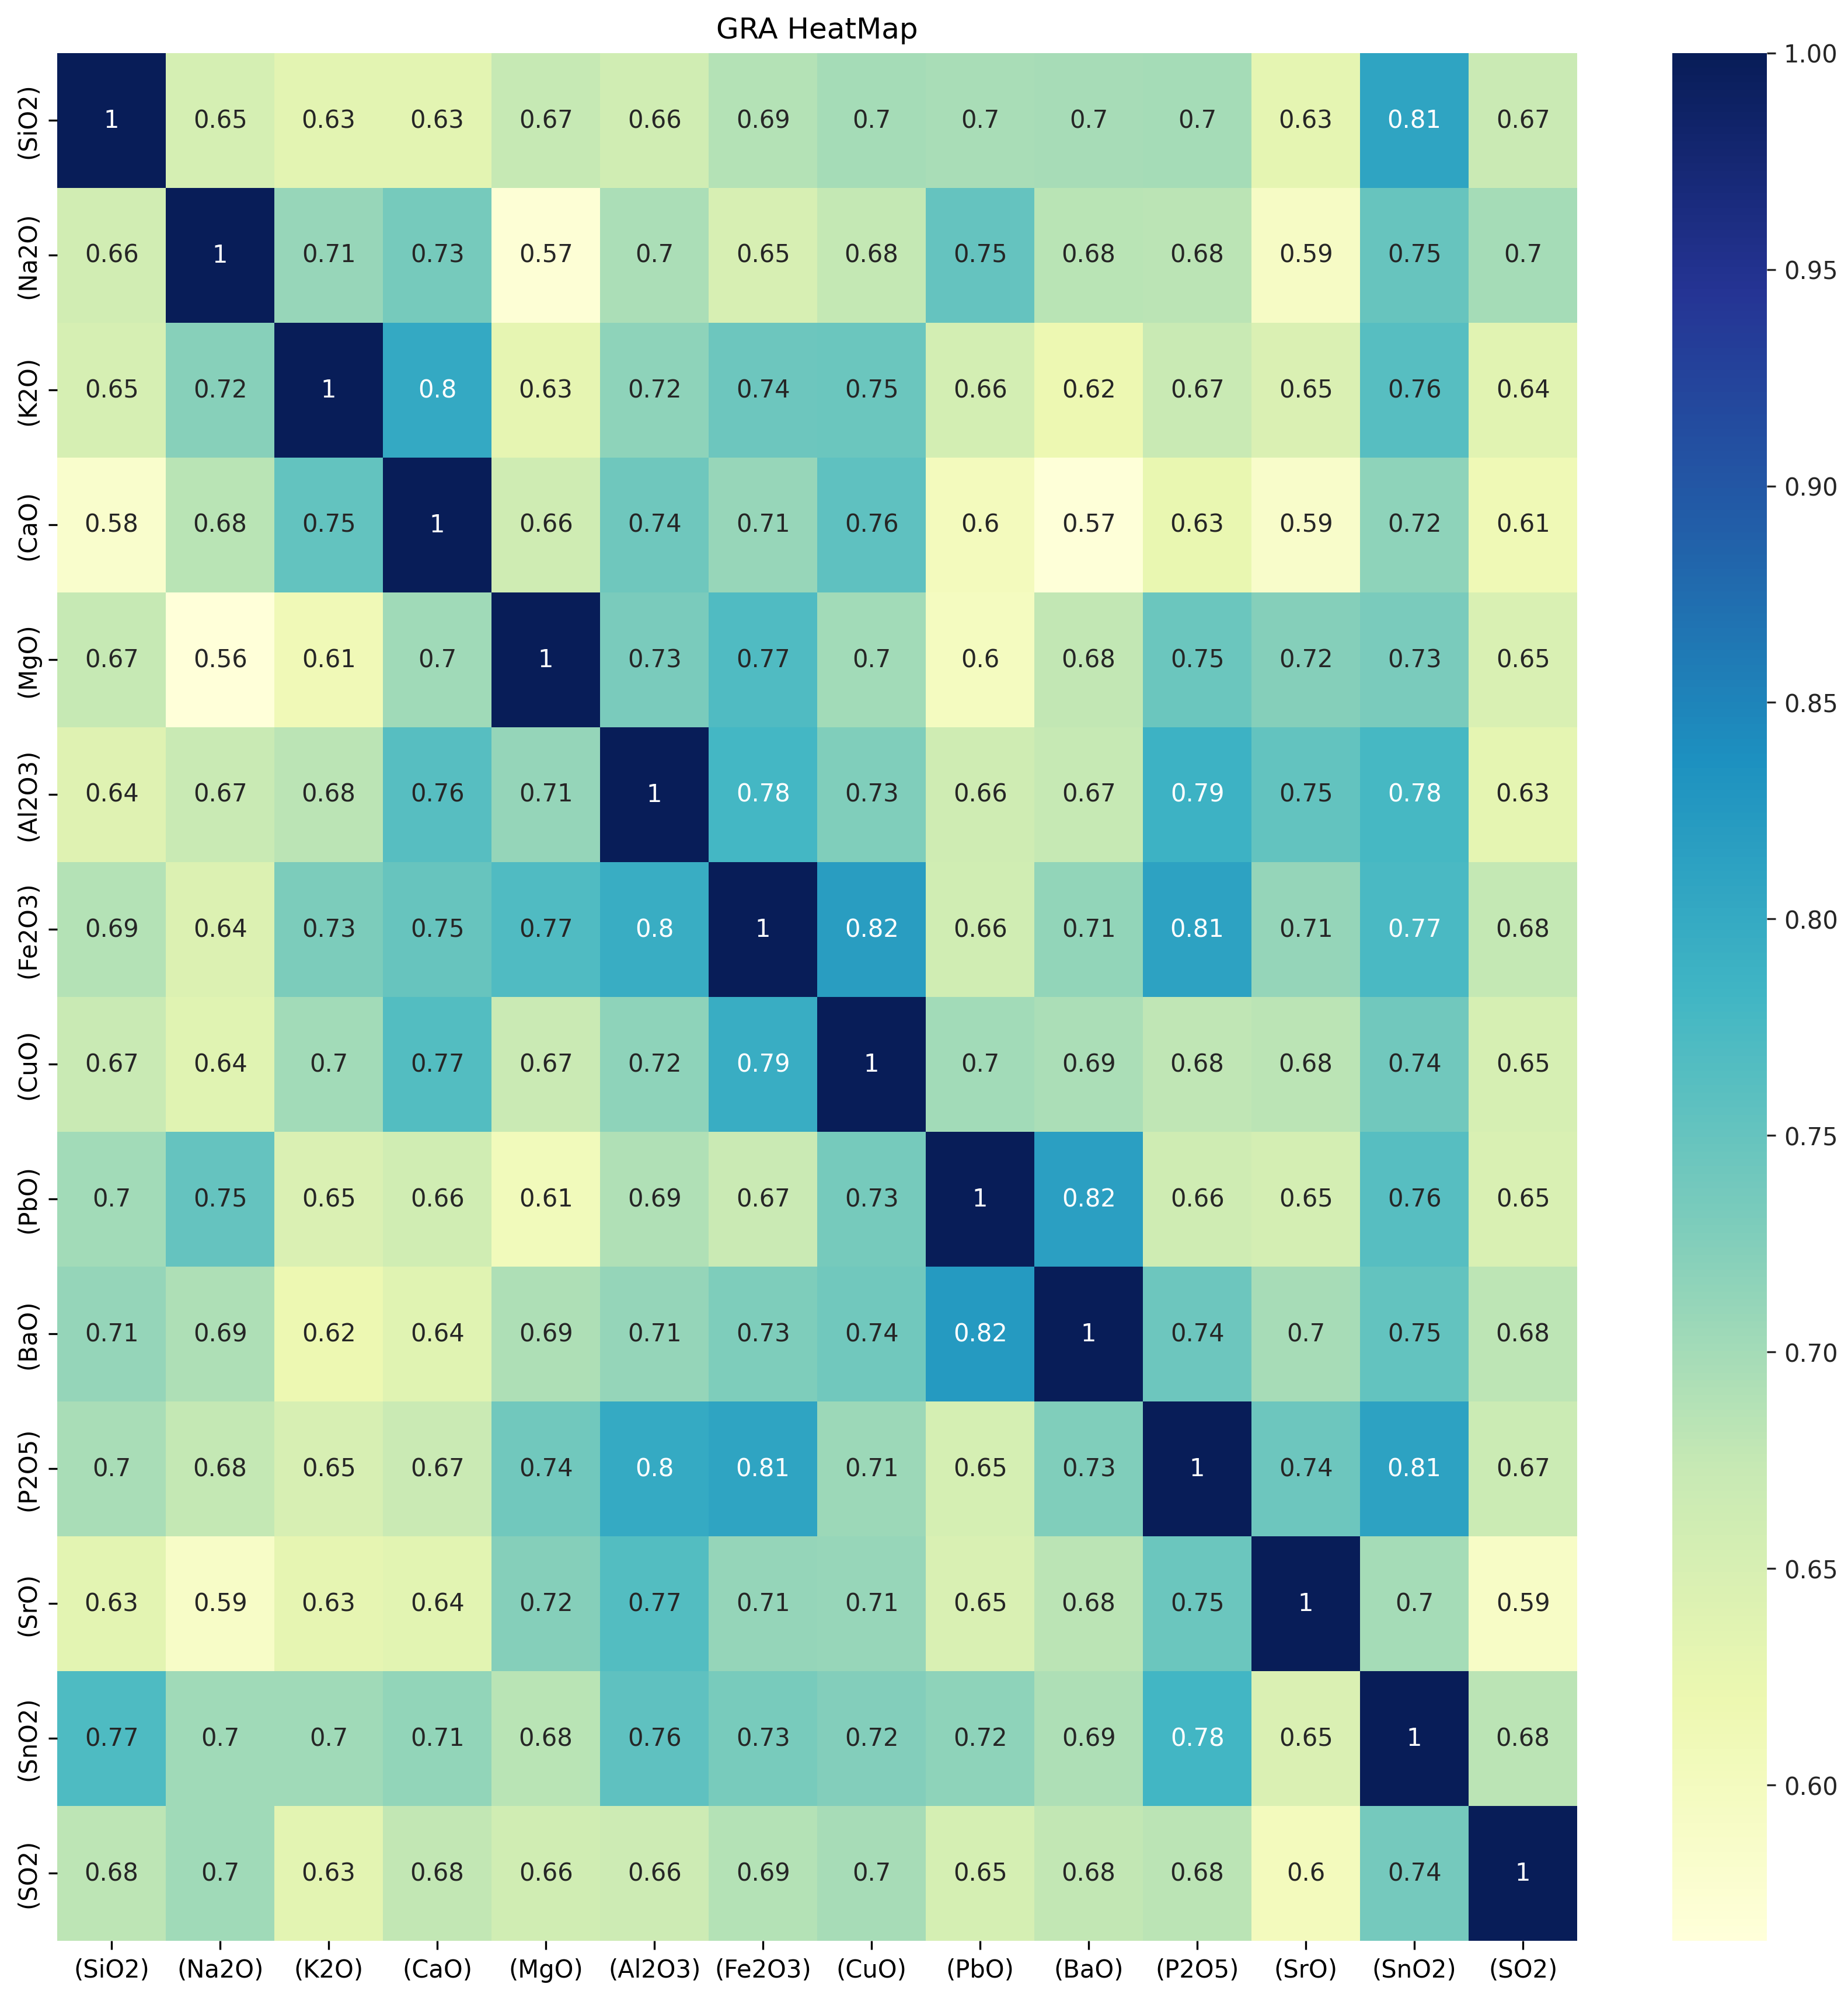

Index(['(SiO2)', '(Na2O)', '(K2O)', '(CaO)', '(MgO)', '(Al2O3)', '(Fe2O3)',
       '(CuO)', '(PbO)', '(BaO)', '(P2O5)', '(SrO)', '(SnO2)', '(SO2)'],
      dtype='object')


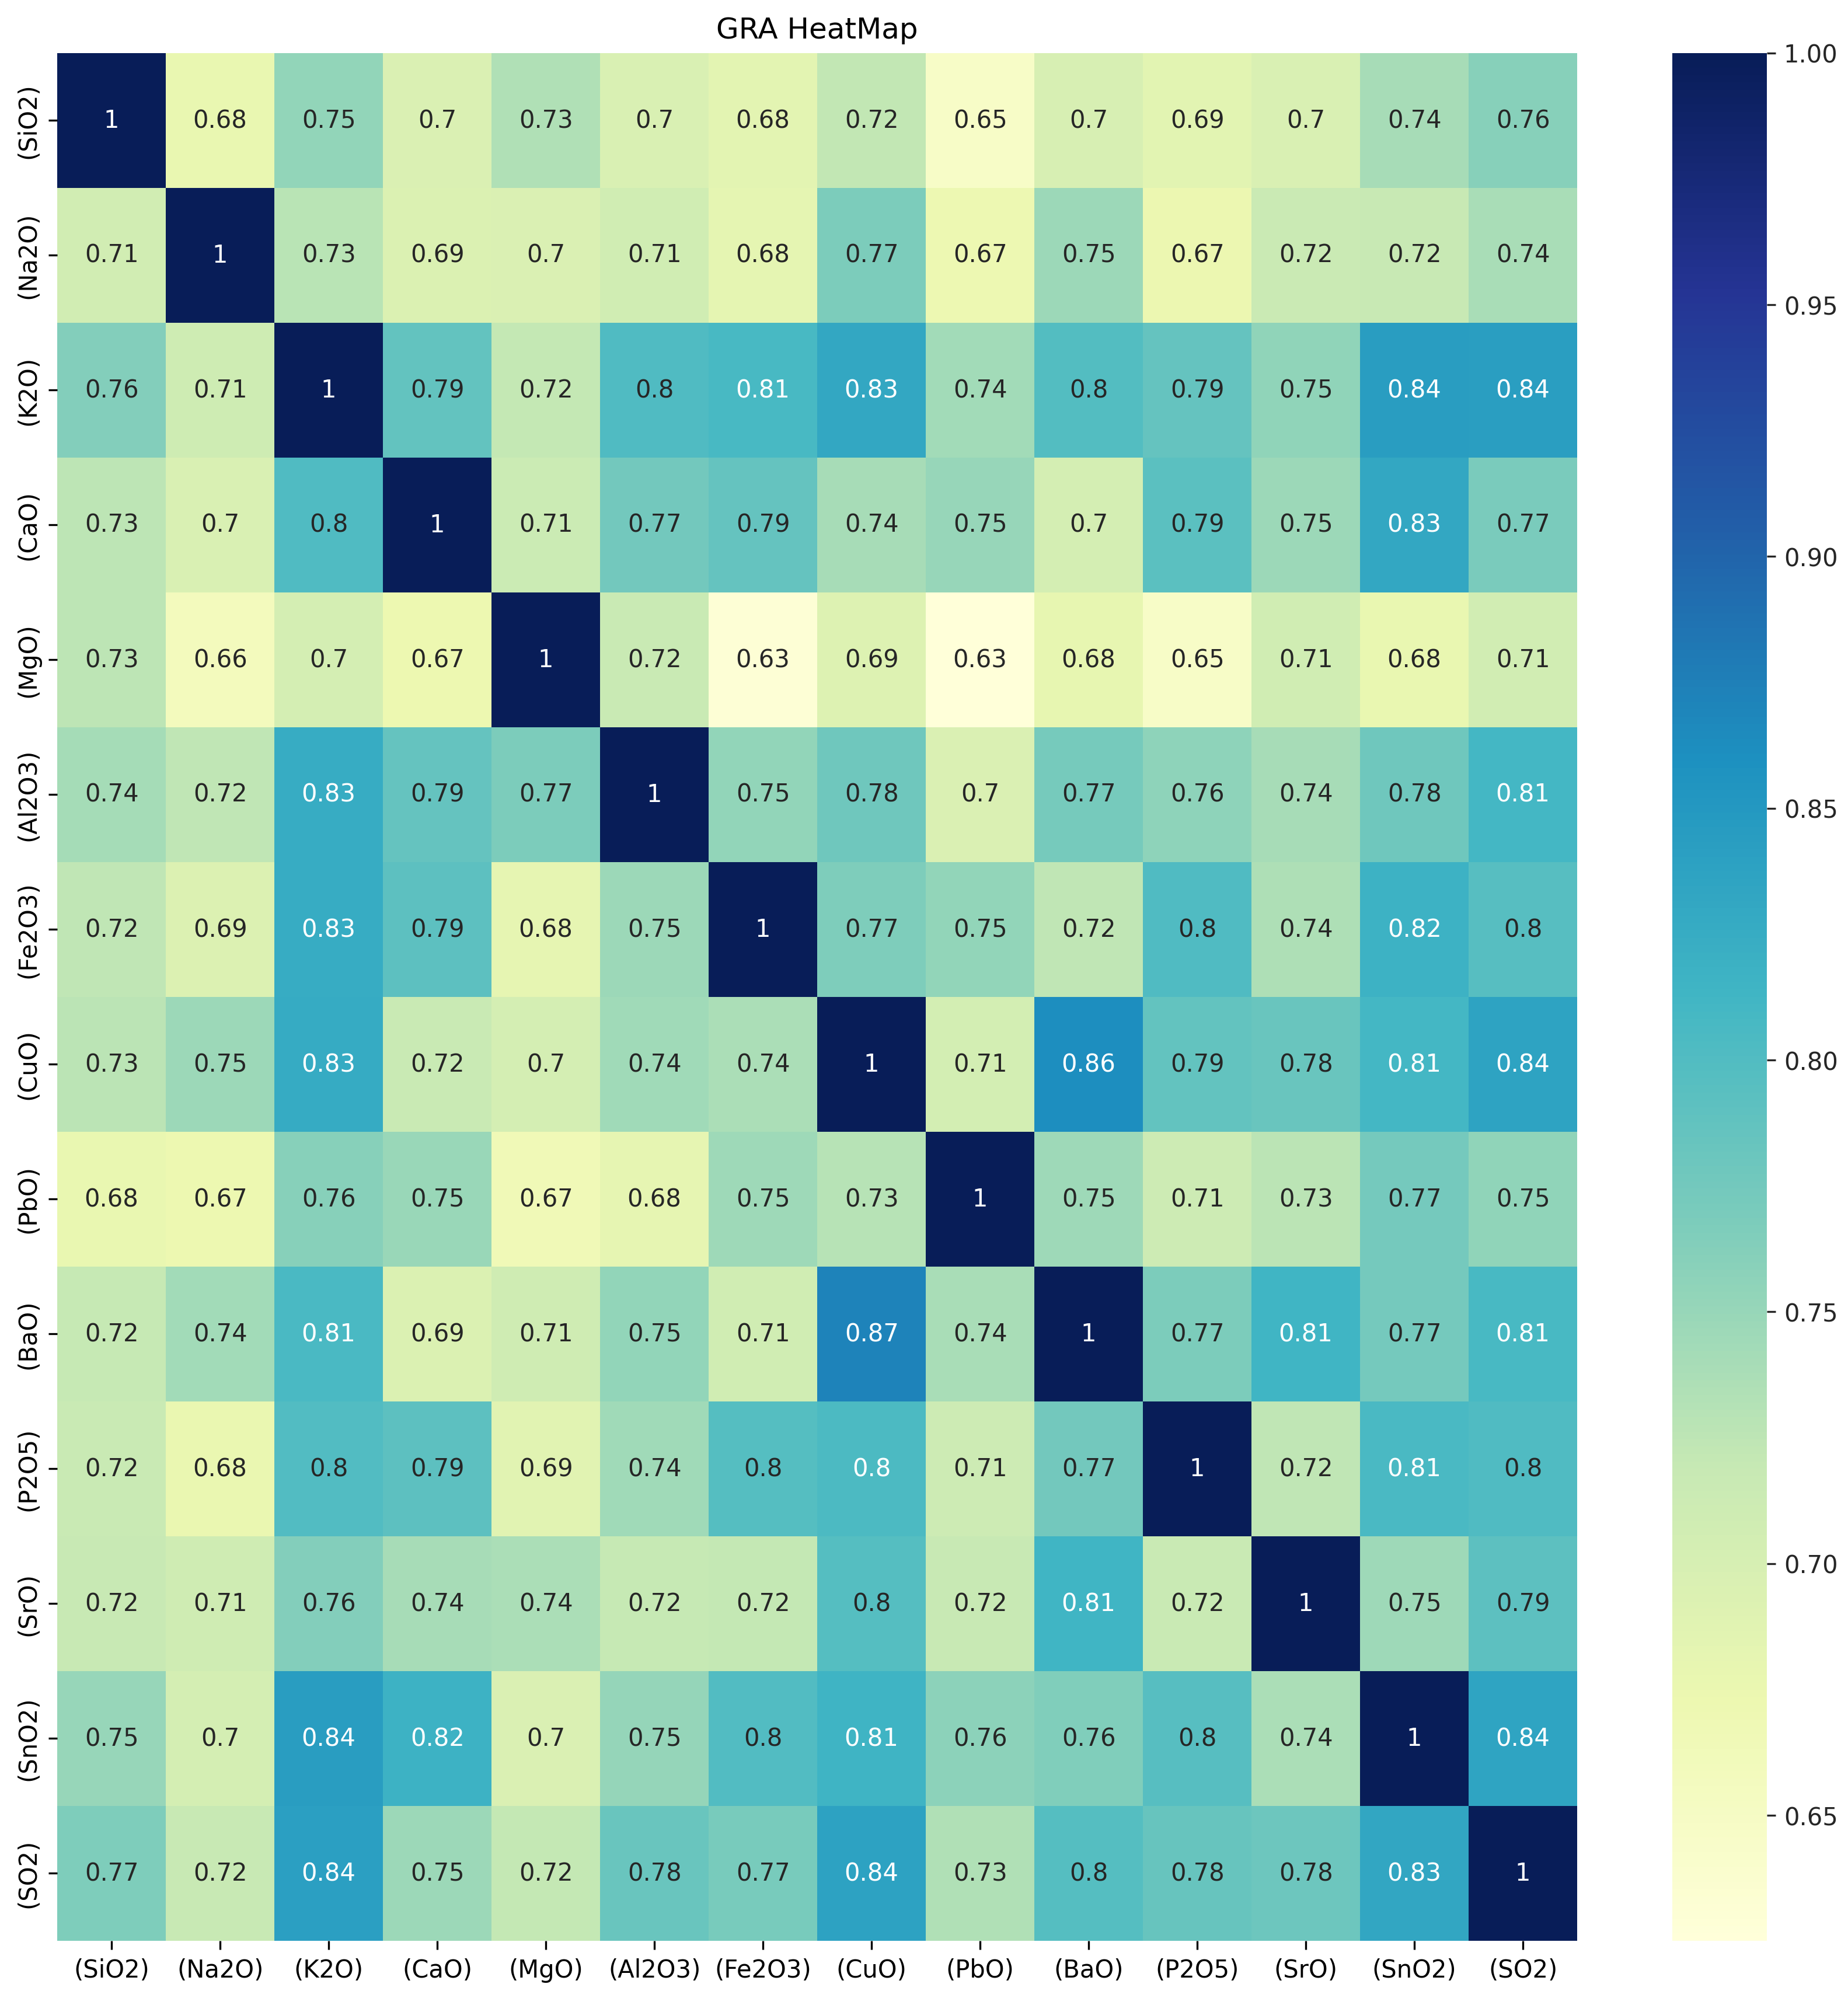

Index(['(SiO2)', '(K2O)', '(CaO)', '(Al2O3)', '(Fe2O3)', '(CuO)', '(P2O5)'], dtype='object')


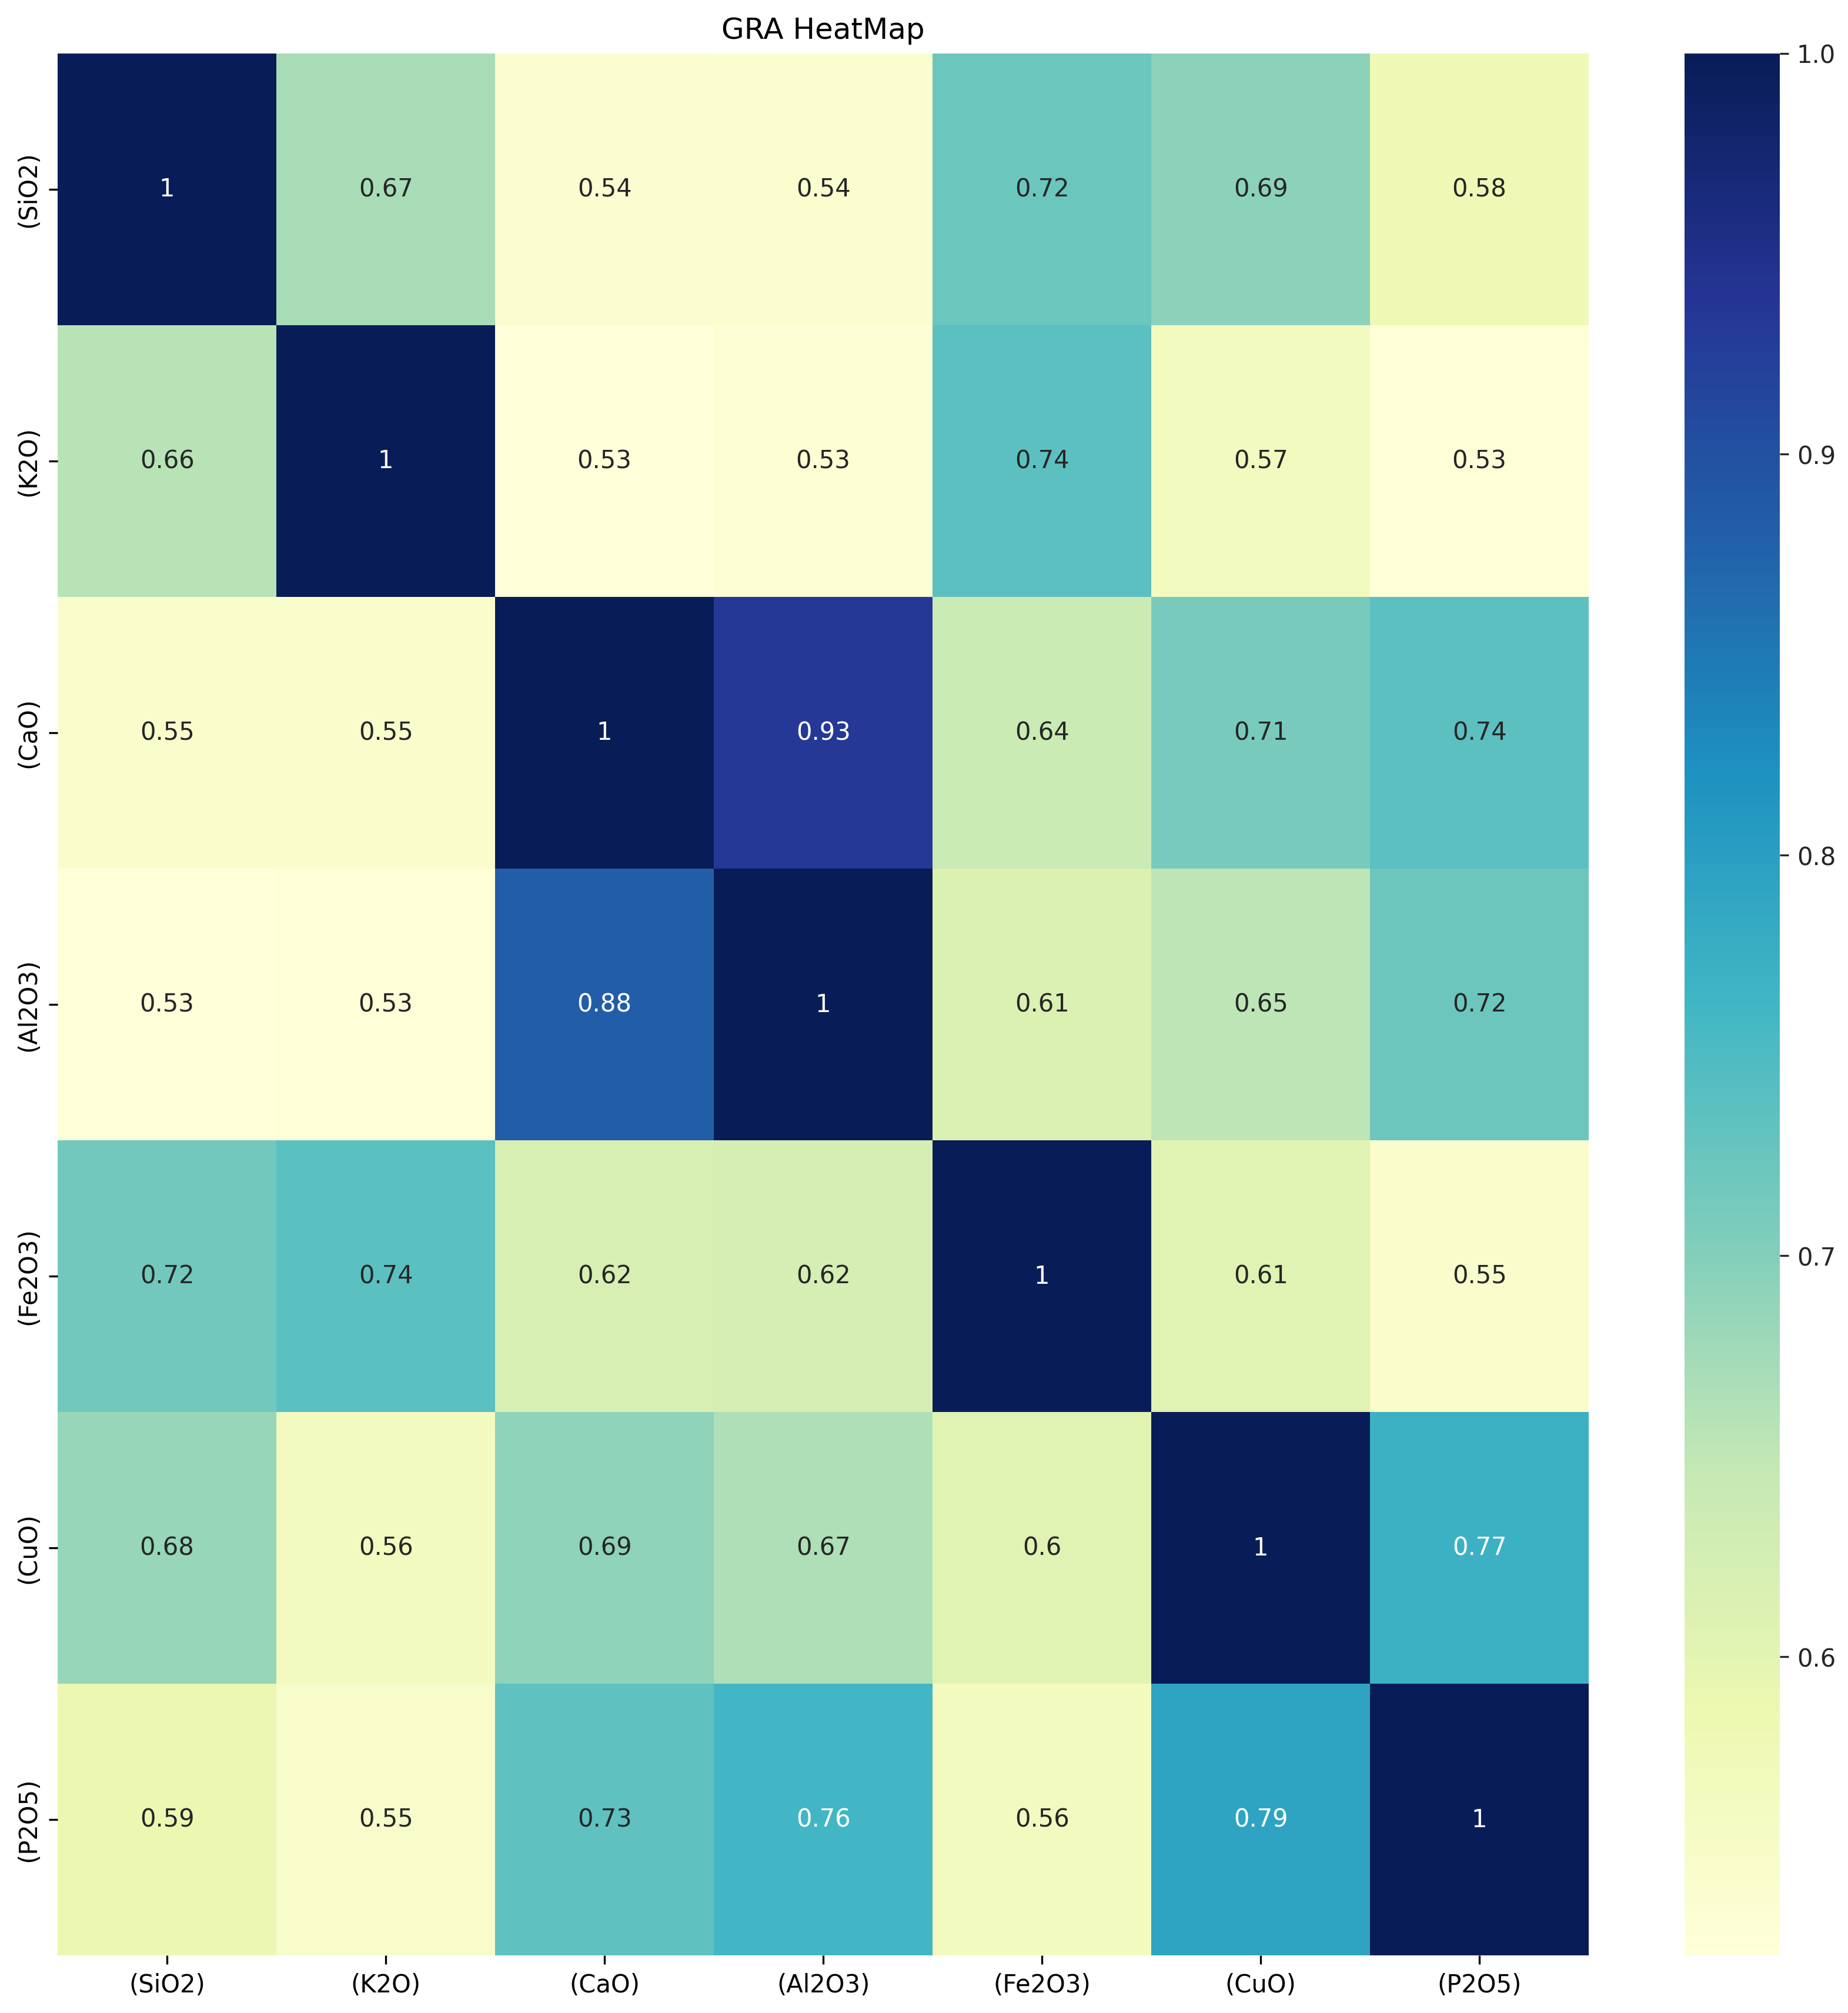

Index(['(SiO2)', '(Na2O)', '(K2O)', '(CaO)', '(MgO)', '(Al2O3)', '(Fe2O3)',
       '(CuO)', '(PbO)', '(BaO)', '(P2O5)', '(SrO)', '(SnO2)', '(SO2)'],
      dtype='object')


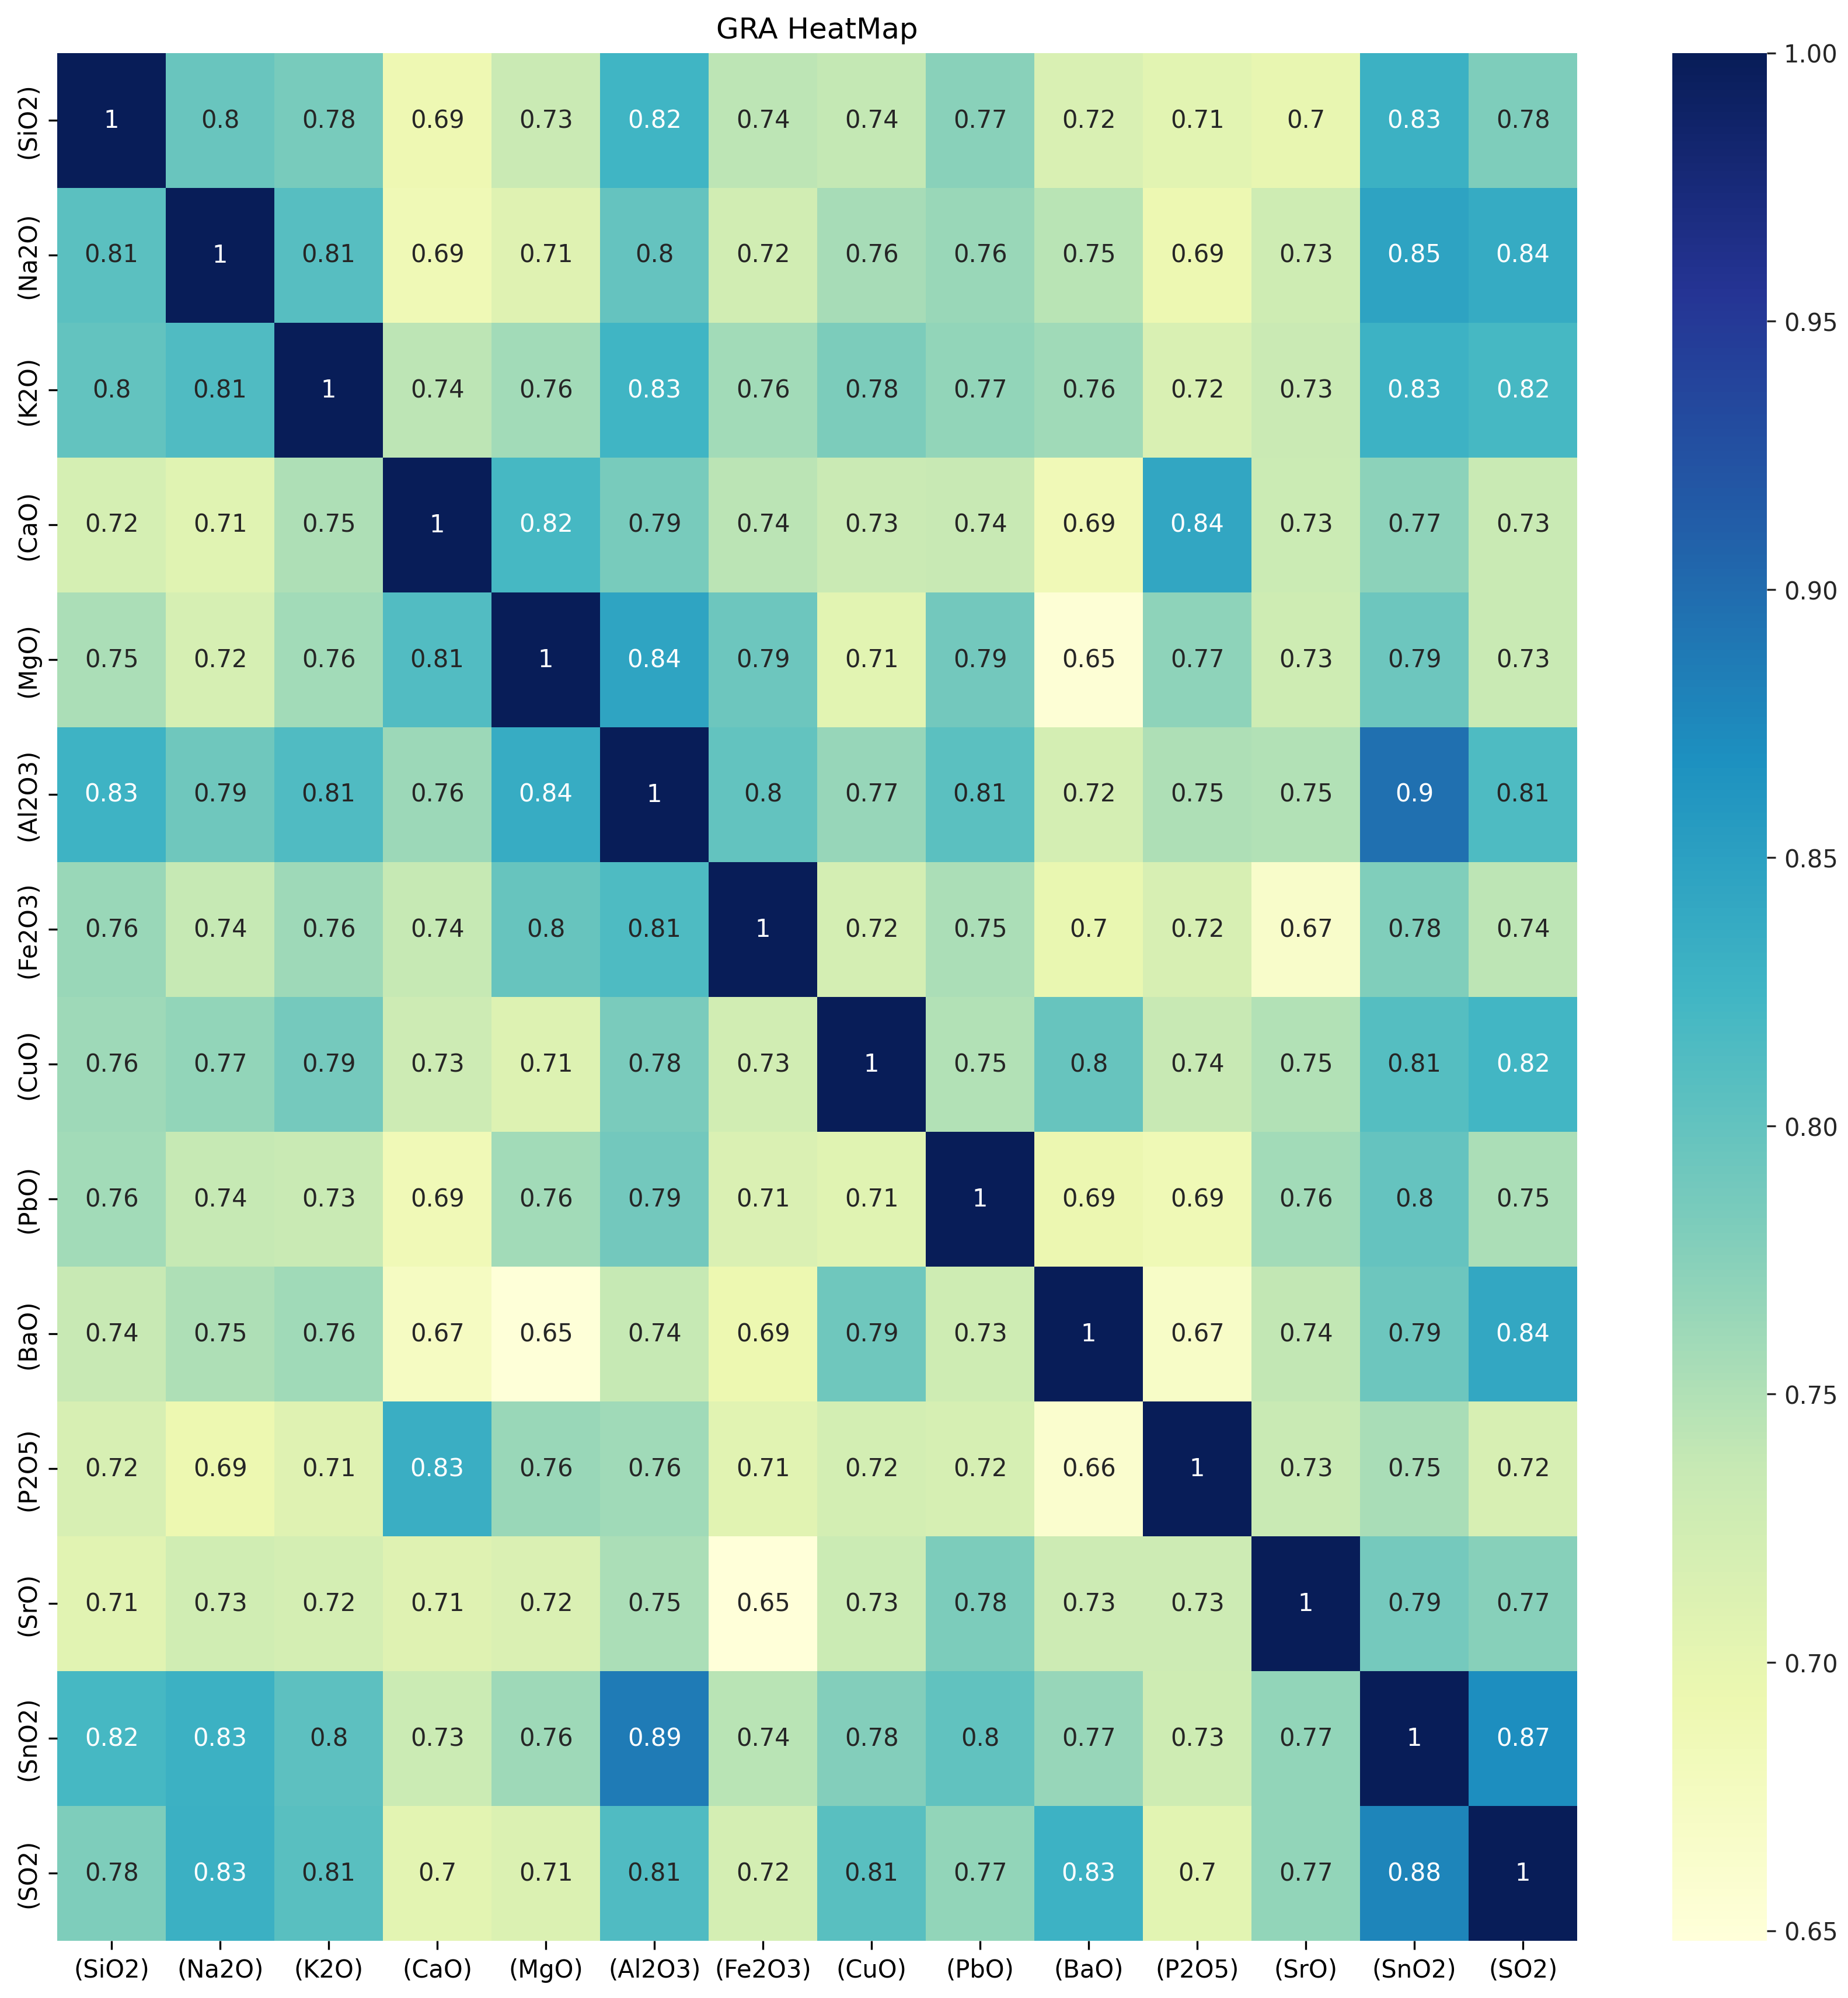

In [41]:

data_wine_GRA1 = GRA(f1)
ShowGRAHeatMap(data_wine_GRA1,f1.columns)
data_wine_GRA2 = GRA(f2)
ShowGRAHeatMap(data_wine_GRA2,f2.columns)
data_wine_GRA3 = GRA(f3)
ShowGRAHeatMap(data_wine_GRA3,f3.columns)
data_wine_GRA4 = GRA(f4)
ShowGRAHeatMap(data_wine_GRA4 ,f4.columns)